In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [2]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [3]:
# Connect to SQLite database
engine = create_engine("sqlite:///hawaii.sqlite")

# Create base class for automap schema in SQLAlchemy (foundation for building)
Base = automap_base()

In [4]:
# reflect an existing database into a new model
Base.prepare(engine, reflect=True)

In [5]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [6]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [7]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

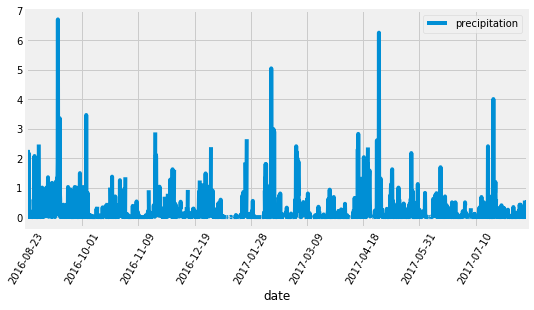

In [8]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 

# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = []
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date','precipitation'])

# Sort the dataframe by date
df.set_index(df['date'], inplace=True)
df = df.sort_index()
#print(df.to_string(index=False))

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(figsize=(8,4), rot=60)

In [84]:
print(prev_year)

2016-08-23


In [9]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [10]:
# How many stations are available in this dataset?
session.query(func.count(Station.station)).all()


[(9)]

In [11]:
# What are the most active stations?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()



[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [12]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()


[(54.0, 85.0, 71.66378066378067)]

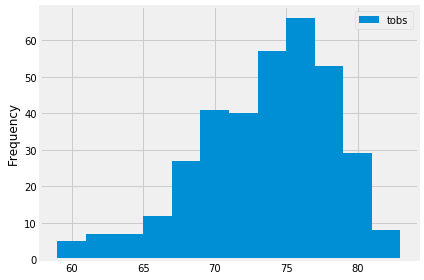

In [13]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()

#print(results)
df = pd.DataFrame(results, columns=['tobs'])

df.plot.hist(bins=12)
plt.tight_layout()

In [94]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates

def calc_temps(start, end):
    #results = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.date >= start).all()
    
    results = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.date >= start).filter(Measurement.date <= end).all()
    
    
    return (results)

In [95]:
print (calc_temps('2017-02-23', '2017-04-23'))

[(61.0, 83.0, 72.66307277628033)]


# Challenge

In [111]:
# dates from 2010-01-01 to 2017-08-23

#get rainfall and temp data for all data
results = []
results = session.query(Measurement.date, Measurement.prcp, Measurement.tobs, Measurement.station).all()
df = pd.DataFrame(results, columns=['date','precipitation', 'tobs', 'station'])

# Sort the dataframe by date, split date into year, month, day columns
df.set_index(df['date'], inplace=True)
df = df.sort_index()
df[['year','month','day']] = df.date.str.split('-', n=2, expand=True)
df

,date,precipitation,tobs,station,year,month,day
date,,,,,,,
2010-01-01,2010-01-01,0.08,65.0,USC00519397,2010,01,01
2010-01-01,2010-01-01,0.21,72.0,USC00518838,2010,01,01
2010-01-01,2010-01-01,0.15,75.0,USC00519523,2010,01,01
2010-01-01,2010-01-01,0.15,70.0,USC00519281,2010,01,01
2010-01-01,2010-01-01,0.05,66.0,USC00511918,2010,01,01
...,...,...,...,...,...,...,...
2017-08-22,2017-08-22,0.50,76.0,USC00516128,2017,08,22
2017-08-23,2017-08-23,0.00,81.0,USC00519397,2017,08,23
2017-08-23,2017-08-23,0.00,82.0,USC00514830,2017,08,23


In [127]:
# get june, and december data frames

june_df = df.copy()
june_df = june_df[june_df['month']=='07']
dec_df = df.copy()
dec_df = dec_df[dec_df['month']=='12']

In [132]:
print("June")
june_df.describe()

June


,precipitation,tobs
count,1569.000000,1711.000000
mean,0.167922,76.082408
std,0.625977,3.356532
min,0.000000,61.000000
25%,0.000000,74.000000
50%,0.020000,76.000000
75%,0.120000,78.000000
max,11.530000,87.000000


In [133]:
print(" December")
dec_df.describe()

 December


,precipitation,tobs
count,1405.000000,1517.000000
mean,0.216819,71.041529
std,0.541399,3.745920
min,0.000000,56.000000
25%,0.000000,69.000000
50%,0.030000,71.000000
75%,0.150000,74.000000
max,6.420000,83.000000


In [ ]:
# Findings

#  Looking at temp mean and std, we can see the June weather is warmer, 
#  and less variable than the December weather. From the percipitation tab,
#  June gets more total rainfall with a higher variance in rainfall, 
#  but less average rainfall then December. 

# Recomendations

#  Narrow our search to the weather station closest to the proposed location
#  for more accurate data. Narrow our search range to only the past 2-3 years
#  for more recent data. Compare the summary statistics from each station
#  to find the location with warmest weather, and fewest rain days. 